In [ ]:
# set up cutoff threshold for lower and upper bounds
cutoff_lo = 0.7
cutoff_hi = 0.10

In [ ]:
import numpy as np
import pandas as pd 
import os

import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
%cd /content/gdrive/My Drive/
%ls

/content/gdrive/My Drive
 170613.pdf              kaggle/                     submission_imagesize.csv
'Coding Problems.gdoc'   model_1_customsize.csv      submission_minmax_6_1.csv
'Colab Notebooks'/       model_1_imagesize.csv       submission_minmax_6.csv
'DP Problems.gdoc'      'MVP Experiment'/            submission_minmax_75_1.csv
 F3/                     public_all_included.csv     submission_minmax_8_2.csv
 Final/                  public_only_best_ones.csv   submission_minmax.csv
 Fsub1/                  submission1.csv
 Fsub2/                  submission_customsize.csv


In [ ]:
def MinMaxBestBaseStacking(input_folder, best_base, output_path):
    sub_base = pd.read_csv(best_base)
    all_files = os.listdir(input_folder)

    # Read and concatenate submissions
    outs = [pd.read_csv(os.path.join(input_folder, f), index_col = 0) for f in all_files]
    concat_sub = pd.concat(outs, axis = 1)
    cols = list(map(lambda x: "target" + str(x), range(len(concat_sub.columns))))
    concat_sub.columns = cols
    concat_sub.reset_index(inplace = True)

    # get the data fields ready for stacking
    concat_sub['is_iceberg_max'] = concat_sub.iloc[:, 1:5].max(axis = 1)
    concat_sub['is_iceberg_min'] = concat_sub.iloc[:, 1:5].min(axis = 1)
    concat_sub['is_iceberg_mean'] = concat_sub.iloc[:, 1:5].mean(axis = 1)
    concat_sub['is_iceberg_median'] = concat_sub.iloc[:, 1:5].median(axis = 1)

    concat_sub['is_iceberg_base'] = sub_base['target']

    concat_sub['target'] = np.where(np.all(concat_sub.iloc[:, 1:5] > cutoff_lo, axis = 1),
                                    concat_sub['is_iceberg_max'],
                                    np.where(np.all(concat_sub.iloc[:, 1:5] < cutoff_hi, axis=1),
                                             concat_sub['is_iceberg_min'],
                                             concat_sub['is_iceberg_base']))
    
    plt.hist(concat_sub['target'], bins = 500)
    plt.show()

    concat_sub[['image_name', 'target']].to_csv(output_path, index = False, float_format = '%.12f')

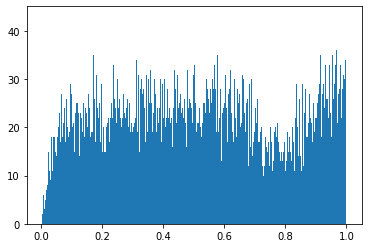

In [ ]:
MinMaxBestBaseStacking('Fsub1/', 'model_1_imagesize.csv', 'submission2.csv')

In [ ]:
%ls F3/

sube10.csv  sube12.csv  sube14.csv  sube2.csv  sube4.csv  sube6.csv  sube8.csv
sube11.csv  sube13.csv  sube1.csv   sube3.csv  sube5.csv  sube7.csv  sube9.csv
